<a href="https://colab.research.google.com/github/racoonjonny/Tensorflow_study/blob/main/6_RNN_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# RNN 간단한 예제를 해결해보자.

# 앞쪽 3개의 숫자를 바탕으로 그 다음에 오는 숫자를 예측하는 예제.

# RNN 모델을 구현할 때 가장 핵심이 되는 부분은 데이터의 구조이고 RNN 레이어의 입력 데이터는
# (batch_size, time steps, input dims) 같은 구조로 주어져야 함.

# batch_size : time steps (= window size)으로 분리되어 있는 데이터의 총 개수
# time steps : 몇 개의 데이터를 이용해서 정답을 만들어 내는지를 나타냄
# input dims : RNN 레이어로 한 번에 들어가는 데이터의 개수

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


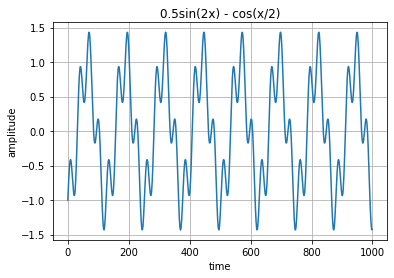

In [2]:
# 시계열 데이터 y = 0.5sin(2x) - cos(x/2) 정의 및 생성
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras import Sequential

x = np.arange(0, 100, 0.1)  # 1000개의 시계열 데이터
y = 0.5*np.sin(2*x) - np.cos(x/2.0)

seq_data = y.reshape(-1,1) # (1000,1) 형태로 바꿔줌

print(seq_data.shape)
print(seq_data[:5])

plt.grid()
plt.title('0.5sin(2x) - cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)

plt.show()

In [4]:
# 입력데이터 X, 정답데이터 Y 생성

# RNN 입력 형태로 만들어주는 함수 정의
def seq2dataset(seq, window, horizon):
  X = []
  Y = []

  for i in range(len(seq)- (window + horizon) + 1):
    x = seq[i : (i + window)]
    y = (seq[i + window + horizon -1])

    X.append(x)
    Y.append(y)
  return np.array(X), np.array(Y)
  
w = 20
h = 1

X, Y = seq2dataset(seq_data, w, h)

print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [6]:
# 트레이닝 데이터/ 테스트 데이터 분리

split_ratio = 0.8

split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [8]:
# SimpleRNN 모델 구축

model = Sequential()

model.add(SimpleRNN( units = 128, activation= 'tanh', input_shape = x_train[0].shape))

model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 128)               16640     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [10]:
# SimpleRNN 모델 컴파일 및 학습

model.compile(loss  = 'mse', optimizer = 'adam', metrics = ['mae'])

hist = model.fit(x_train, y_train, epochs = 100, validation_data = (x_test, y_test))

Epoch 1/100
25/25 [==============================] - 1s 16ms/step - loss: 0.0207 - mae: 0.1036 - val_loss: 0.0044 - val_mae: 0.0567
Epoch 2/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0018 - mae: 0.0332 - val_loss: 6.7212e-04 - val_mae: 0.0212
Epoch 3/100
25/25 [==============================] - 0s 8ms/step - loss: 6.2179e-04 - mae: 0.0202 - val_loss: 4.3223e-04 - val_mae: 0.0161
Epoch 4/100
25/25 [==============================] - 0s 8ms/step - loss: 2.9604e-04 - mae: 0.0133 - val_loss: 2.3249e-04 - val_mae: 0.0116
Epoch 5/100
25/25 [==============================] - 0s 8ms/step - loss: 1.9980e-04 - mae: 0.0108 - val_loss: 1.6735e-04 - val_mae: 0.0099
Epoch 6/100
25/25 [==============================] - 0s 8ms/step - loss: 1.3717e-04 - mae: 0.0090 - val_loss: 9.3274e-05 - val_mae: 0.0075
Epoch 7/100
25/25 [==============================] - 0s 8ms/step - loss: 1.1253e-04 - mae: 0.0084 - val_loss: 8.2306e-05 - val_mae: 0.0069
Epoch 8/100
25/25 [===================

In [11]:
# ↑ 100번의 epoch 동안 mae와 val_mae가 현저하게 감소함을 확인할 수 있다.

# 정확도 및 손실을 살펴보자.

pred = model.predict(x_test)
print(pred.shape)

rand_idx = np.random.randint(0, len(y_test), size = 5)

print(' random idx =', rand_idx, '\n')
print('prediction = ', pred.flatten()[rand_idx])
print('target = ', y_test.flatten()[rand_idx])

# prediction과 정답이 거의 일치하는 것을 확인할 수 있다.

(196, 1)
 random idx = [ 67 188  89 134  27] 

prediction =  [-1.422612   -1.0275939  -0.55003196  0.57043993  0.9122836 ]
target =  [-1.40174681 -1.01735903 -0.55845475  0.58476182  0.90868638]


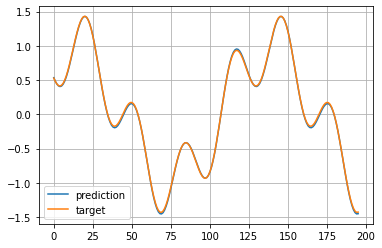

In [12]:
# 그래프로 그려서 확인해보자.
plt.plot(pred, label = 'prediction')
plt.plot(y_test, label = 'target')

plt.grid()
plt.legend(loc = 'best')

plt.show()

# prediction과 target이 거의 일치한다.

# 사실 패턴이 정해져 있는 데이터여서 학습이 잘 됬을 확률이 높음

# 비 정형적 데이터 혹은 패턴이 없는 데이터를 이용해서 모델을 만들기 위해서는 더 복잡한 구조를 사용하거나 다양한 시도를 해봐야 함.